<a href="https://colab.research.google.com/github/allanbatista/classificacao-de-produtos-no-e-commerce/blob/master/codigo/notebooks/Distor%C3%A7%C3%A3o_de_Imagens_com_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distorção de Imagens

As imagens passam por diversos processos antes de serem injetadas no modelo para que seja treinado. O objetivo aqui é criar um maior conjunto de dados artificialmente.

### Download de Dependênciais

In [1]:
!pip install tensorflow==2.3.0 tensorflow-addons==0.11.2 --quiet

In [2]:
import tensorflow as tf
import tensorflow_addons as tfa

print("tensorflow", tf.__version__, "tensorflow_addons", tfa.__version__)

tensorflow 2.3.0 tensorflow_addons 0.11.2



### Download Imagens

Faz o download das imagens e convert para Tensor. Formato que será utilizado durante as distorções.


In [3]:
import requests

URLS = [
	'https://images-americanas.b2w.io/produtos/01/00/img/1741750/0/1741750028_1SZ.jpg',
	'https://images-americanas.b2w.io/produtos/01/00/img/1474047/1/1474047100_3SZ.jpg',
	"https://images-americanas.b2w.io/produtos/01/00/img/1866878/8/1866878826_1SZ.jpg",
	"https://images-americanas.b2w.io/produtos/01/00/img/1611315/9/1611315984_1SZ.jpg",
	"https://images-americanas.b2w.io/produtos/01/00/img/1774755/0/1774755010_1SZ.jpg"
]

# download images
images = [requests.get(url).content for url in URLS]

# converte as Imagens para Tensor
images = tf.stack(tf.map_fn(tf.io.decode_image, tf.constant(images, dtype=tf.string), dtype=tf.uint8))

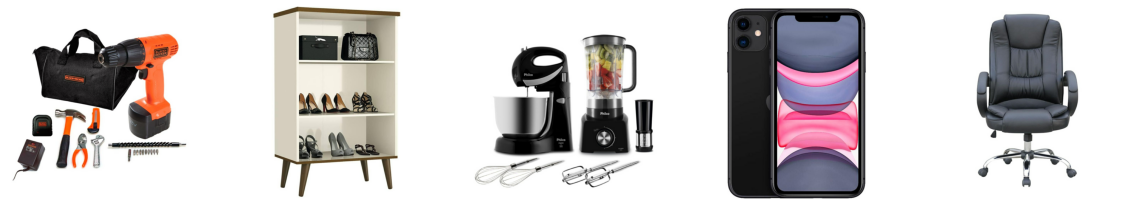

In [4]:
import matplotlib.pyplot as plt

# Exibe as Imagens
fig, axis = plt.subplots(1, len(images),figsize=(20,10))
for img, ax in zip(images, axis):
	ax.axis('off')
	ax.imshow(img)

plt.show()

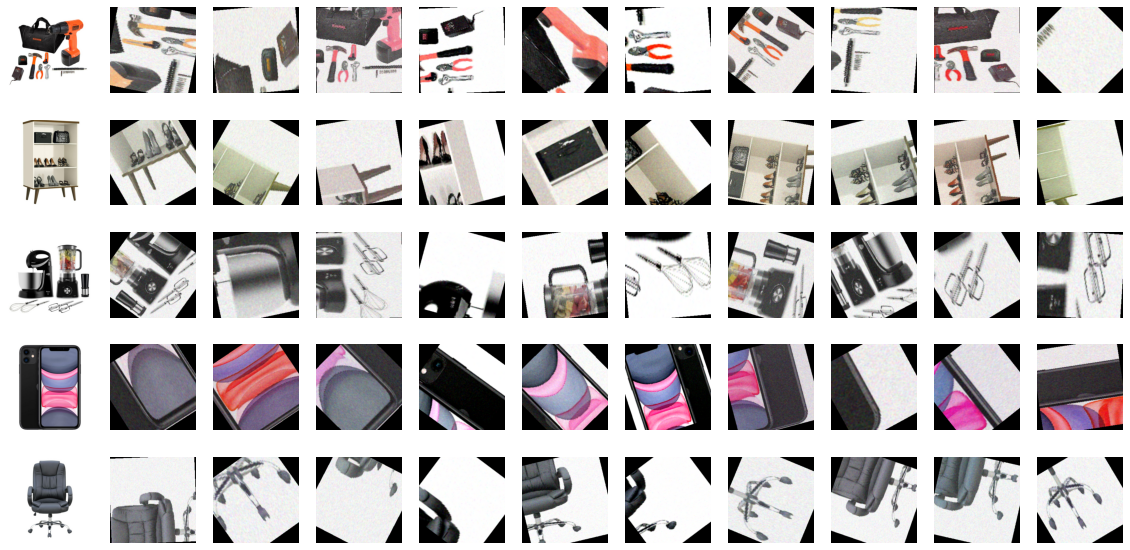

In [10]:
IMAGE_SIZE = [256, 256]

def random_crop_image_squares(imgs, minstart=0, maxstart=0.75, minsize=0.25, maxsize=1.0, ouput_size=IMAGE_SIZE):
  a = tf.random.uniform(shape=(imgs.shape[0], 2), minval=minstart, maxval=maxstart)
  b = tf.random.uniform(shape=(imgs.shape[0], 2), minval=minsize, maxval=maxsize)

  boxes = tf.concat([a, tf.clip_by_value(a + b, 0.0, 1.0)], axis=1)

  return tf.image.crop_and_resize(imgs, boxes, tf.range(imgs.shape[0]), ouput_size)


def gaussian_noise_images(imgs,  mean=0.0, stddev=1.0):
  noise = tf.random.normal(shape=tf.shape(imgs), mean=mean, stddev=stddev, dtype=tf.float32)
  return tf.clip_by_value(imgs + noise, 0.0, 255)


def distorce_image(imgs):
  _length = tf.shape(imgs)[0]

  _imgs = tf.image.resize(imgs, IMAGE_SIZE)
  _imgs = tf.image.random_flip_left_right(_imgs)
  _imgs = tf.image.random_hue(_imgs, 0.08)
  _imgs = tf.image.random_saturation(_imgs, 0.1, 1.6)
  _imgs = tf.image.random_brightness(_imgs, 0.1)
  _imgs = tf.image.random_contrast(_imgs, 0.7, 1.3)
  _imgs = gaussian_noise_images(_imgs, mean=0.0, stddev=10.0)
  _imgs = random_crop_image_squares(_imgs, ouput_size=IMAGE_SIZE)
  _imgs = tfa.image.rotate(_imgs, tf.random.uniform(shape=[_length], minval=0.0, maxval=2.0))

  return _imgs

# Exibe as Imagens
fig, axis = plt.subplots(len(images), 11, figsize=(20, 10))

for j, img in enumerate(images):
  ax = axis[j, 0]
  ax.axis('off')
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.imshow(tf.cast(img, tf.uint8))

for i in range(1, 11):
  for j, img in enumerate(distorce_image(images)):
    ax = axis[j, i]
    ax.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(tf.cast(img, tf.uint8))

plt.show()